<a href="https://colab.research.google.com/github/surajkonline/R-D-AIML-workshop/blob/surajkonline-Regression_auto_mpg/AutoMPG_data_for_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing numpy, pandas & matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/surajkonline/R-D-AIML-workshop/surajkonline-Regression_auto_mpg/auto-mpg.csv') 

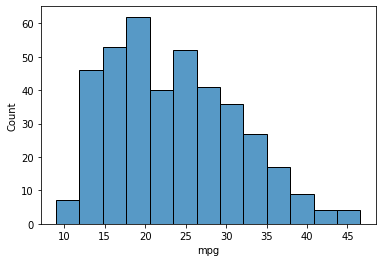

In [4]:
sns.histplot(data=df, x="mpg");

In [ ]:
# Examining top five rows of dataframe
df.head()

mpg  cylinders  displacement  ... model year  origin                   car name
0  18.0          8         307.0  ...         70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70       1          buick skylark 320
2  18.0          8         318.0  ...         70       1         plymouth satellite
3  16.0          8         304.0  ...         70       1              amc rebel sst
4  17.0          8         302.0  ...         70       1                ford torino

[5 rows x 9 columns]

In [ ]:
# Datatypes/missing values in datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# To see number of unique values in each column
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [ ]:
# to see the unique vaues in each column
for col in df:
    print(df[col].name)
    print(df[col].unique())

mpg
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
cylinders
[8 4 6 3 5]
displacement
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262. 

In [ ]:
# to replace the ? values in horsepower
df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype('float64')

In [ ]:
# to change the origin from 1, 2 & 3 to US/Asian/European
df['origin']=df.origin.map({1: 'US', 2: 'Asian',3:'European'})

In [ ]:
# Check whether above changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# To understand the descriptive statistics
df.describe().round(1)

mpg  cylinders  displacement  ...  weight  acceleration  model year
count  398.0      398.0         398.0  ...   398.0         398.0       398.0
mean    23.5        5.5         193.4  ...  2970.4          15.6        76.0
std      7.8        1.7         104.3  ...   846.8           2.8         3.7
min      9.0        3.0          68.0  ...  1613.0           8.0        70.0
25%     17.5        4.0         104.2  ...  2223.8          13.8        73.0
50%     23.0        4.0         148.5  ...  2803.5          15.5        76.0
75%     29.0        8.0         262.0  ...  3608.0          17.2        79.0
max     46.6        8.0         455.0  ...  5140.0          24.8        82.0

[8 rows x 7 columns]

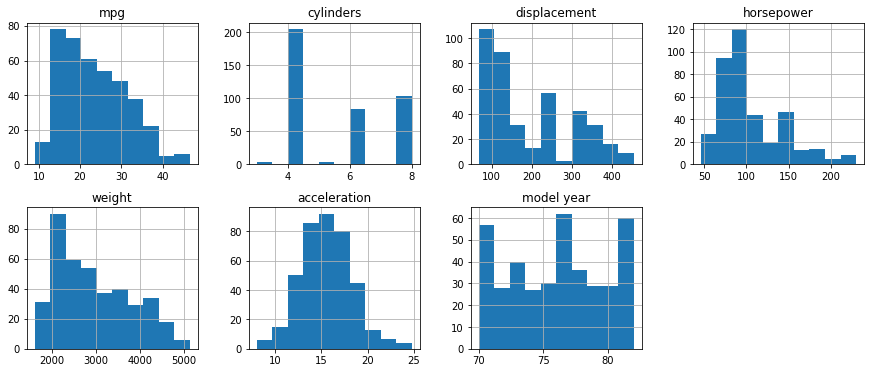

In [ ]:
# To plot histograms to check distribution
df.hist(figsize= (15,6), layout= (2,4));

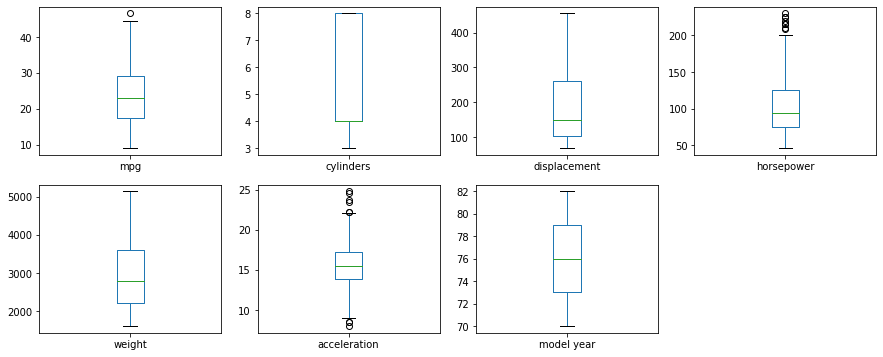

In [ ]:
# To plot box-plots to see the outlier/ skew in the distribution
df.plot(kind='box', subplots=True, layout= (2,4), figsize= (15,6));

In [ ]:
# To check counts of cars origin-wise
df['origin'].value_counts(normalize=False).round(2)

US          249
European     79
Asian        70
Name: origin, dtype: int64

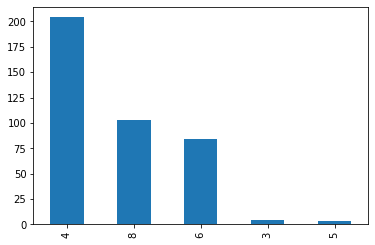

In [ ]:
# To plot bar chart of cars cylinder wise
df['cylinders'].value_counts(normalize=False).round(2).plot(kind='bar');

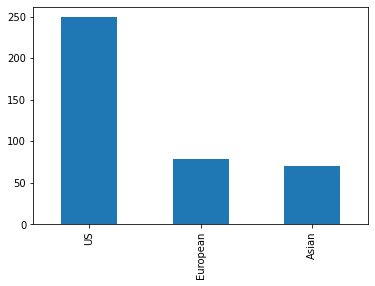

In [ ]:
df['origin'].value_counts(normalize=False).round(2).plot(kind='bar');

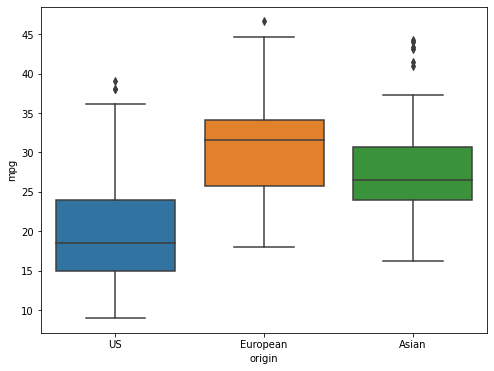

In [ ]:
# To plot box-plots of mpg/origin-wise
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='origin', y="mpg", data=df)

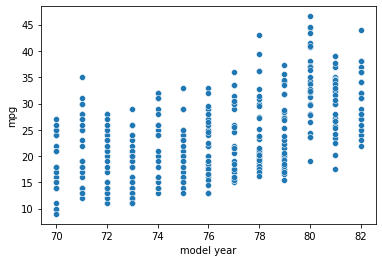

In [ ]:
# Is mpg improving year after year.
sns.scatterplot(x = "model year", y = 'mpg' , data = df);

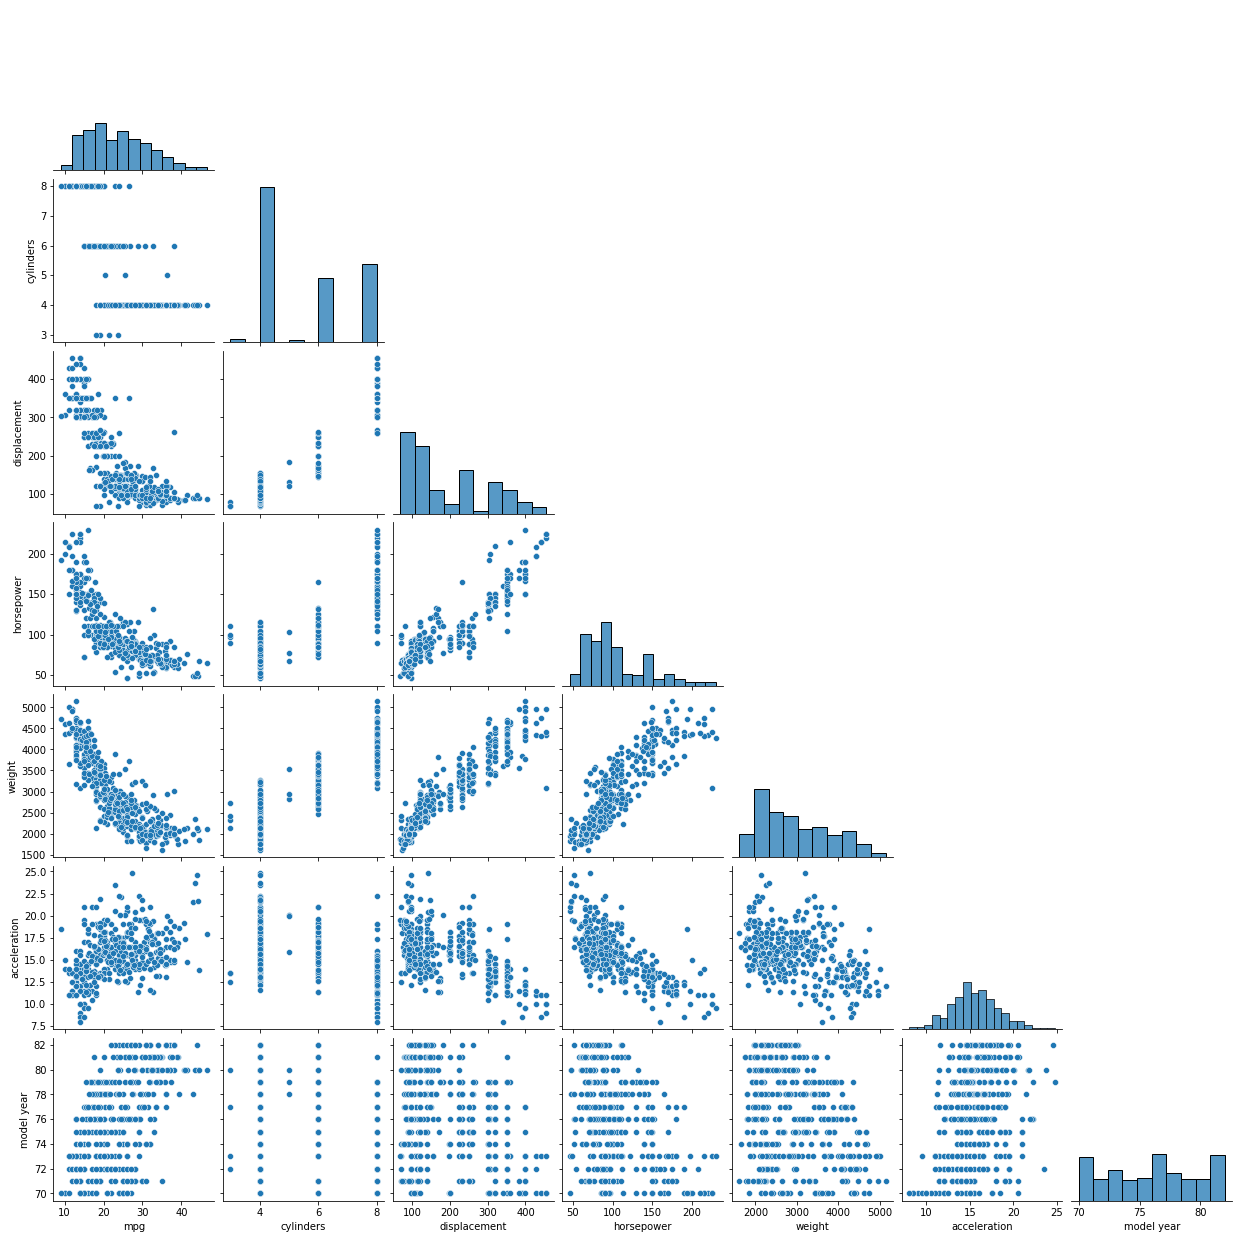

In [ ]:
#To see all scatter plots ar same time
sns.pairplot(df, corner= True );

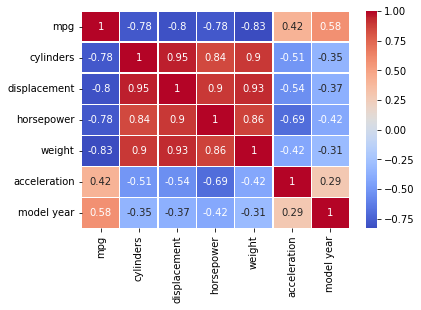

In [ ]:
# To see correlation between target & predictors as well as between predictors
sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, cmap='coolwarm',annot=True);

In [ ]:
pip install missingno --quiet

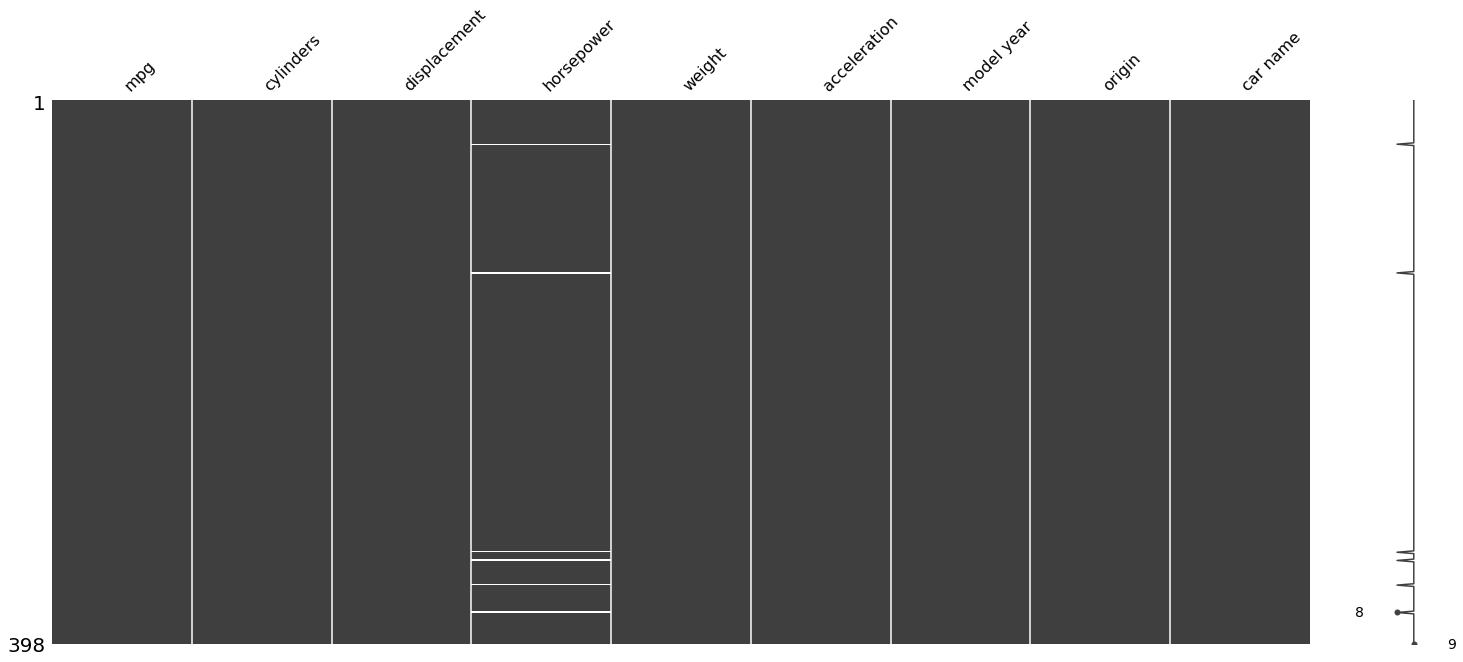

In [ ]:
import missingno as msno
msno.matrix(df);

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quiet

     | 25.9 MB 144 kB/s
     |████████████████████████████████| 10.9 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 102 kB 8.5 MB/s 
     |████████████████████████████████| 675 kB 44.3 MB/s 
     |████████████████████████████████| 4.7 MB 30.0 MB/s 
     |████████████████████████████████| 63 kB 61 kB/s 
     |████████████████████████████████| 812 kB 51.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Saving profile report
profile_report = df.profile_report(html={"style": {"full_width": True}})

In [ ]:
# Printing profie report
profile_report.to_file("/content/example.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

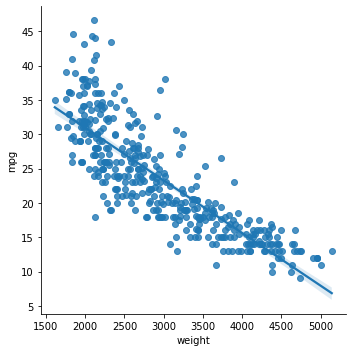

In [ ]:
sns.lmplot(x = "weight", y = 'mpg' , data = df, order=1);